In [15]:
import os
import numpy as np
import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from keras.callbacks import ModelCheckpoint

fruitNetModel=models.Sequential()

fruitNetModel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
fruitNetModel.add(layers.Conv2D(32, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Flatten())
fruitNetModel.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
fruitNetModel.add(layers.Dropout(0.2))
fruitNetModel.add(layers.Dense(120, activation='softmax'))

fruitNetModel.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
fruitNetModel.summary()

filepath="FruitNet_fruit_image_classification_120_classes.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 64)        0         
__________

In [2]:
train_dir='D:\\TensorFlow Programs\\fruit_image_classification_120_classes\\fruits\\fruits-360_dataset\\fruits-360\\Training'
validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_120_classes\\fruits\\fruits-360_dataset\\fruits-360\\Validation'
test_dir='D:\\TensorFlow Programs\\fruit_image_classification_120_classes\\fruits\\fruits-360_dataset\\fruits-360\\Test'

In [11]:
import os
import shutil
import glob
import random

CATEGORIES=os.listdir(test_dir)

for category in CATEGORIES:
    src_path=os.path.join(test_dir,category)
    imgs_to_be_moved = random.sample(glob.glob(os.path.join(src_path,"*.jpg")), 50)
    for img in enumerate(imgs_to_be_moved):
        dest = os.path.join(validation_dir,category)
        if not os.path.exists(dest):
            os.makedirs(dest)
    for img in enumerate(imgs_to_be_moved):
        shutil.copy(img[1], dest)
        os.remove(img[1])

In [12]:
batch_size=32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 60498 images belonging to 120 classes.
Found 6000 images belonging to 120 classes.


In [13]:
number_of_training_samples=60498
number_of_validation_samples=6000

In [16]:
import math

history = fruitNetModel.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=100,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Epoch 1/100
1890/1890 [==============================] - 1506s 797ms/step - loss: 3.0742 - categorical_accuracy: 0.2421 - val_loss: 1.2944 - val_categorical_accuracy: 0.7036
Epoch 2/100
1890/1890 [==============================] - 496s 263ms/step - loss: 1.3717 - categorical_accuracy: 0.6113 - val_loss: 0.6836 - val_categorical_accuracy: 0.8371
Epoch 3/100
1890/1890 [==============================] - 487s 258ms/step - loss: 0.8955 - categorical_accuracy: 0.7544 - val_loss: 0.4575 - val_categorical_accuracy: 0.9120
Epoch 4/100
1890/1890 [==============================] - 496s 263ms/step - loss: 0.6921 - categorical_accuracy: 0.8169 - val_loss: 0.3753 - val_categorical_accuracy: 0.9335
Epoch 5/100
1890/1890 [==============================] - 489s 259ms/step - loss: 0.5692 - categorical_accuracy: 0.8544 - val_loss: 0.3238 - val_categorical_accuracy: 0.9427
Epoch 6/100
1890/1890 [==============================] - 479s 253ms/step - loss: 0.4928 - categorical_accuracy: 0.8783 - val_loss: 0.3

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109349). Check your callbacks.
  % delta_t_median)


1890/1890 [==============================] - 462s 244ms/step - loss: 0.2121 - categorical_accuracy: 0.9586 - val_loss: 0.1557 - val_categorical_accuracy: 0.9848
Epoch 26/100
1890/1890 [==============================] - 459s 243ms/step - loss: 0.2117 - categorical_accuracy: 0.9591 - val_loss: 0.1493 - val_categorical_accuracy: 0.9871
Epoch 27/100
1890/1890 [==============================] - 461s 244ms/step - loss: 0.2035 - categorical_accuracy: 0.9614 - val_loss: 0.1626 - val_categorical_accuracy: 0.9782
Epoch 28/100
   3/1890 [..............................] - ETA: 3:41 - loss: 0.2367 - categorical_accuracy: 0.9479

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109353). Check your callbacks.
  % delta_t_median)


1890/1890 [==============================] - 461s 244ms/step - loss: 0.2050 - categorical_accuracy: 0.9613 - val_loss: 0.1628 - val_categorical_accuracy: 0.9767
Epoch 29/100
1890/1890 [==============================] - 460s 243ms/step - loss: 0.1963 - categorical_accuracy: 0.9633 - val_loss: 0.1649 - val_categorical_accuracy: 0.9809
Epoch 30/100
1890/1890 [==============================] - 462s 244ms/step - loss: 0.1953 - categorical_accuracy: 0.9650 - val_loss: 0.1494 - val_categorical_accuracy: 0.9826
Epoch 31/100
1890/1890 [==============================] - 647s 343ms/step - loss: 0.1931 - categorical_accuracy: 0.9650 - val_loss: 0.1589 - val_categorical_accuracy: 0.9802
Epoch 32/100
1890/1890 [==============================] - 489s 259ms/step - loss: 0.1909 - categorical_accuracy: 0.9650 - val_loss: 0.1381 - val_categorical_accuracy: 0.9844
Epoch 33/100
1890/1890 [==============================] - 458s 242ms/step - loss: 0.1850 - categorical_accuracy: 0.9671 - val_loss: 0.1536 - va

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.113695). Check your callbacks.
  % delta_t_median)


1890/1890 [==============================] - 485s 257ms/step - loss: 0.1582 - categorical_accuracy: 0.9731 - val_loss: 0.1394 - val_categorical_accuracy: 0.9879
Epoch 55/100
1890/1890 [==============================] - 488s 258ms/step - loss: 0.1543 - categorical_accuracy: 0.9743 - val_loss: 0.1325 - val_categorical_accuracy: 0.9846
Epoch 56/100
1890/1890 [==============================] - 489s 259ms/step - loss: 0.1531 - categorical_accuracy: 0.9746 - val_loss: 0.1141 - val_categorical_accuracy: 0.9933
Epoch 57/100
1890/1890 [==============================] - 485s 257ms/step - loss: 0.1533 - categorical_accuracy: 0.9753 - val_loss: 0.1465 - val_categorical_accuracy: 0.9821
Epoch 58/100
1890/1890 [==============================] - 487s 258ms/step - loss: 0.1538 - categorical_accuracy: 0.9739 - val_loss: 0.1319 - val_categorical_accuracy: 0.9868
Epoch 59/100
 181/1890 [=>............................] - ETA: 6:52 - loss: 0.1546 - categorical_accuracy: 0.9752

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100203). Check your callbacks.
  % delta_t_median)


1890/1890 [==============================] - 489s 259ms/step - loss: 0.1494 - categorical_accuracy: 0.9755 - val_loss: 0.1186 - val_categorical_accuracy: 0.9879
Epoch 60/100
1890/1890 [==============================] - 488s 258ms/step - loss: 0.1504 - categorical_accuracy: 0.9757 - val_loss: 0.1403 - val_categorical_accuracy: 0.9804
Epoch 61/100
1890/1890 [==============================] - 488s 258ms/step - loss: 0.1470 - categorical_accuracy: 0.9762 - val_loss: 0.1302 - val_categorical_accuracy: 0.9858
Epoch 62/100
1890/1890 [==============================] - 488s 258ms/step - loss: 0.1474 - categorical_accuracy: 0.9764 - val_loss: 0.1440 - val_categorical_accuracy: 0.9832
Epoch 63/100
1890/1890 [==============================] - 490s 259ms/step - loss: 0.1521 - categorical_accuracy: 0.9743 - val_loss: 0.1286 - val_categorical_accuracy: 0.9861
Epoch 64/100
1890/1890 [==============================] - 489s 259ms/step - loss: 0.1453 - categorical_accuracy: 0.9772 - val_loss: 0.1298 - va

C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.109342). Check your callbacks.
  % delta_t_median)


1890/1890 [==============================] - 476s 252ms/step - loss: 0.1310 - categorical_accuracy: 0.9811 - val_loss: 0.1285 - val_categorical_accuracy: 0.9866
Epoch 86/100
1890/1890 [==============================] - 507s 269ms/step - loss: 0.1344 - categorical_accuracy: 0.9802 - val_loss: 0.1346 - val_categorical_accuracy: 0.9878
Epoch 87/100
1890/1890 [==============================] - 479s 253ms/step - loss: 0.1350 - categorical_accuracy: 0.9800 - val_loss: 0.1403 - val_categorical_accuracy: 0.9894
Epoch 88/100
1890/1890 [==============================] - 480s 254ms/step - loss: 0.1291 - categorical_accuracy: 0.9813 - val_loss: 0.1281 - val_categorical_accuracy: 0.9873
Epoch 89/100
1890/1890 [==============================] - 480s 254ms/step - loss: 0.1331 - categorical_accuracy: 0.9800 - val_loss: 0.1344 - val_categorical_accuracy: 0.9888
Epoch 90/100
1890/1890 [==============================] - 504s 267ms/step - loss: 0.1327 - categorical_accuracy: 0.9798 - val_loss: 0.1199 - va

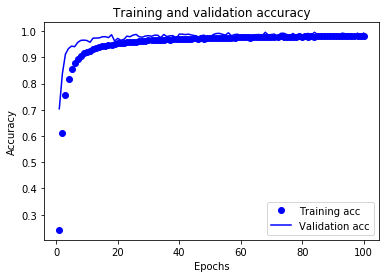

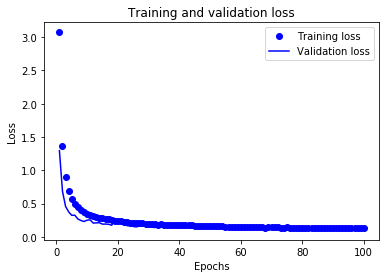

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
number_of_test_samples=14622

In [19]:
from tensorflow.python.keras.models import load_model

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

best_model = load_model('FruitNet_fruit_image_classification_120_classes.h5')
steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_generator, steps=steps_test)
print("Test-set accuracy: {0:.2%}".format(result[1]))

Found 14622 images belonging to 120 classes.
Test-set accuracy: 99.58%
